In [66]:
from skimage import io
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

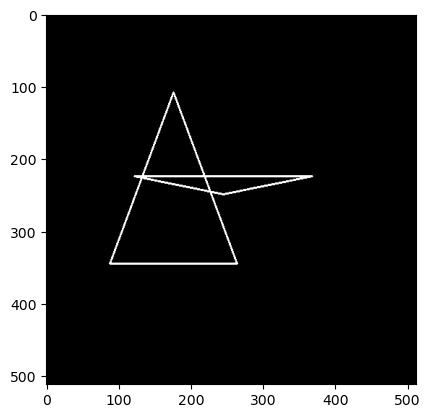

In [93]:
for pp in range(0,2000):
    img=np.zeros((512,512,3), np.uint8)
    for q in range(0,2):
        i=random.randint(1,125)
        j=i+5
        k=260-j
        a=True
        kk=random.randint(5,500)
        lii=[]
        
        while a:
            vv=random.randint(50,480)
            for i in range(-15,15):
                lii.append(vv+i)
            for i in lii:        
                if i==j:
                    vv=i+30
                    a=False
            a=False

        v=random.randint(j,k)
        c=v+j
        n=v+v+j

        img=cv2.line(img,(j,kk),(c,vv),(512,512,512),2)
        img=cv2.line(img,(c,vv),(n,kk),(512,512,512),2)
        img=cv2.line(img,(j,kk),(n,kk),(512,512,512),2)



    plt.imshow(img)

    cv2.imwrite('D://img/na yeksan/img{}.jpg'.format(pp),img)

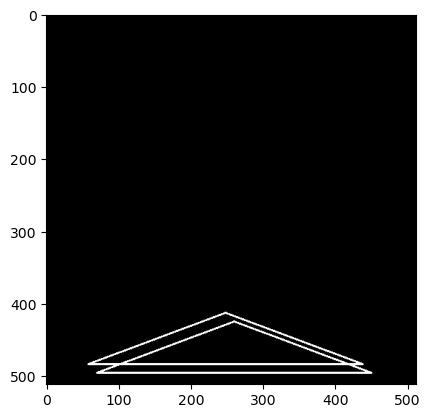

In [94]:
for pp in range(0,2000):
    img=np.zeros((512,512,3), np.uint8)
    i=random.randint(1,125)
    j=i+5
    k=260-j
    a=True
    kk=random.randint(5,500)
    lii=[]
    
    while a:
        vv=random.randint(50,480)
        for i in range(-15,15):
            lii.append(vv+i)
   
        for i in lii:        
            if i==j:
                vv=i+30
                a=False           
        a=False
        
    v=random.randint(j,k)
    c=v+j
    n=v+v+j

    img=cv2.line(img,(j,kk),(c,vv),(512,512,512),2)
    img=cv2.line(img,(c,vv),(n,kk),(512,512,512),2)
    img=cv2.line(img,(j,kk),(n,kk),(512,512,512),2)


    li={'kk':kk,'j':j,'n':n,'vv':vv,'c':c}
    vb=sorted(li.values())

    m=512-vb[-1]
    ll=random.randint(5,m)
    n=n+ll
    vv=vv+ll
    c=c+ll
    kk=kk+ll
    j=j+ll

    img=cv2.line(img,(j,kk),(c,vv),(512,512,512),2)
    img=cv2.line(img,(c,vv),(n,kk),(512,512,512),2)
    img=cv2.line(img,(j,kk),(n,kk),(512,512,512),2)

    plt.imshow(img)
    cv2.imwrite('D://img/yeksan/img{}.jpg'.format(pp),img)

In [69]:
PATH='D://img/'

In [70]:
batch_size = 32
img_height = 160
img_width = 160

In [71]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  PATH,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.


In [72]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  PATH,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [73]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 5)
val_ds = val_ds.skip(val_batches // 5)

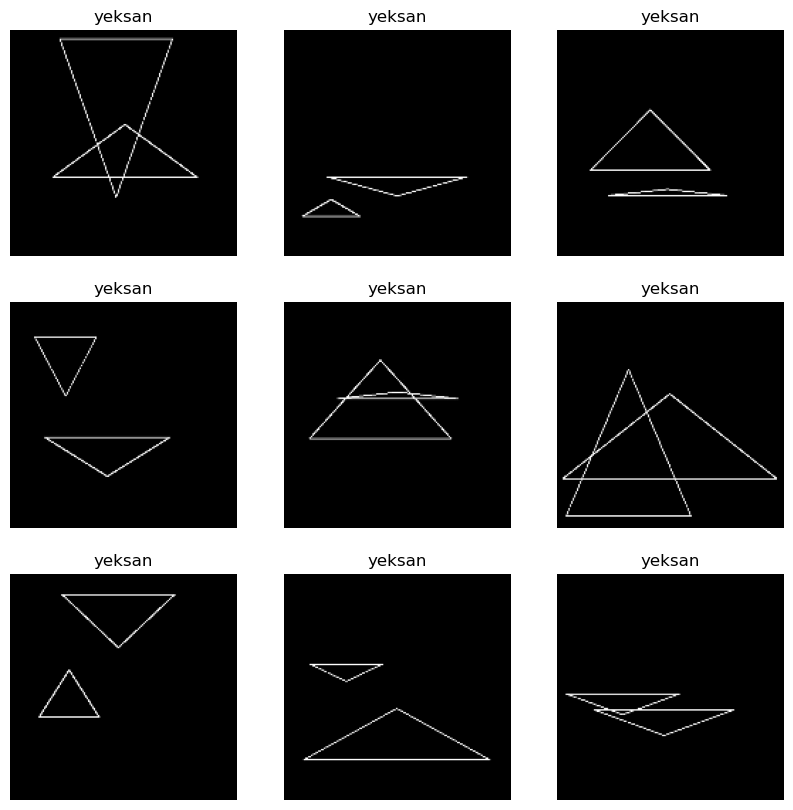

In [74]:
class_names = ['yeksan', 'na yeksan']

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [75]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [76]:
preprocessing=tf.keras.applications.mobilenet_v2.preprocess_input

In [77]:
base_model=tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')

In [78]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [79]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [84]:
prediction_layer = tf.keras.layers.Dense(1)

In [85]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x=preprocessing(inputs)
x = base_model(x, training=False)
x=global_average_layer(x)
x=tf.keras.layers.Dropout(0.2)(x)
outputs=prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [86]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [88]:
history=model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds)

Epoch 1/10
100/100 [==============================] - 88s 880ms/step - loss: 0.2351 - accuracy: 0.8981 - val_loss: 0.1931 - val_accuracy: 0.9484
Epoch 2/10
100/100 [==============================] - 91s 907ms/step - loss: 0.0956 - accuracy: 0.9653 - val_loss: 0.1292 - val_accuracy: 0.9672
Epoch 3/10
100/100 [==============================] - 94s 944ms/step - loss: 0.0734 - accuracy: 0.9719 - val_loss: 0.1148 - val_accuracy: 0.9672
Epoch 4/10
100/100 [==============================] - 91s 911ms/step - loss: 0.0567 - accuracy: 0.9806 - val_loss: 0.1134 - val_accuracy: 0.9688
Epoch 5/10
100/100 [==============================] - 92s 922ms/step - loss: 0.0372 - accuracy: 0.9891 - val_loss: 0.1449 - val_accuracy: 0.9688
Epoch 6/10
100/100 [==============================] - 81s 813ms/step - loss: 0.0282 - accuracy: 0.9887 - val_loss: 0.0914 - val_accuracy: 0.9672
Epoch 7/10
100/100 [==============================] - 81s 815ms/step - loss: 0.0294 - accuracy: 0.9894 - val_loss: 0.1040 - val_ac

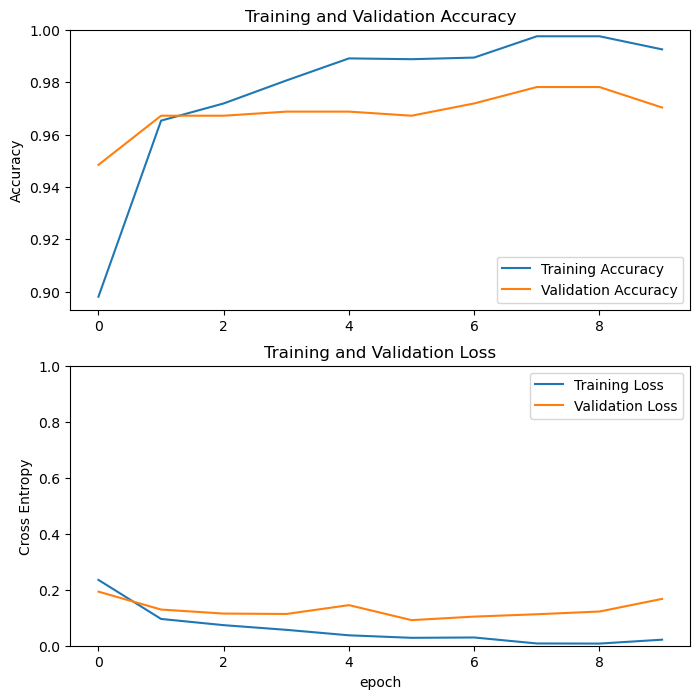

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [91]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

5/5 [==============================] - 1s 206ms/step - loss: 0.1460 - accuracy: 0.9750
Test accuracy : 0.9750000238418579


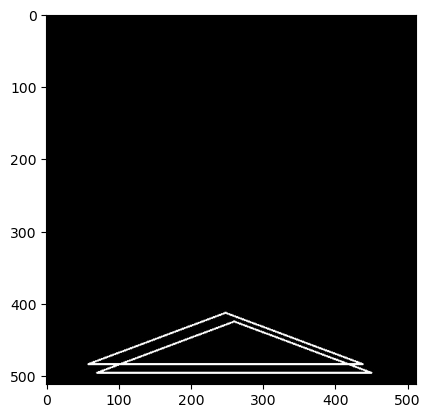

In [102]:
imgg = cv2.imread('D://img1/yeksan/img1.jpg')
plt.imshow(imgg)

In [147]:
path1='D://img1'

In [148]:
test_dataset = tf.keras.utils.image_dataset_from_directory(path1,
                                                            shuffle=True,
                                                            batch_size=32,
                                                            image_size=(160,160))

Found 4 files belonging to 2 classes.


In [169]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()
predictions

array([  2.0123482,   8.671827 , -16.20696  , -17.33324  ], dtype=float32)

Predictions:
 [1 1 0 0]
Labels:
 [1 1 0 0]


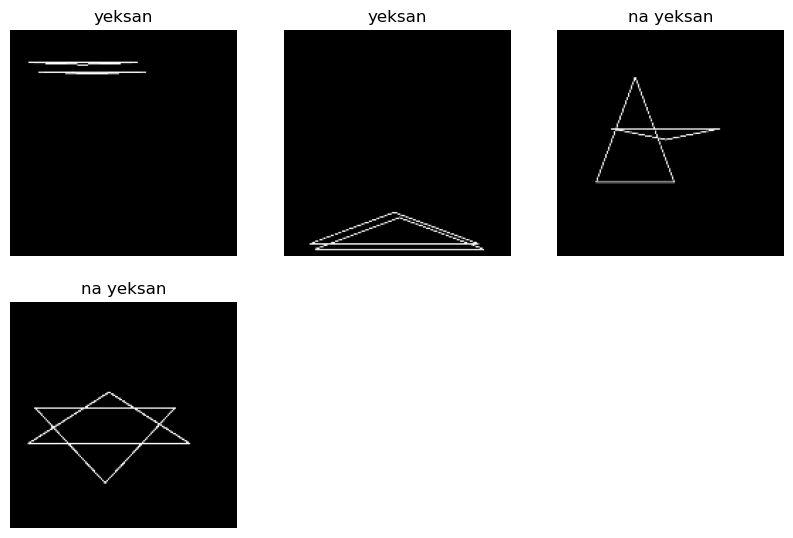

In [170]:

predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(4):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")